In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine, text
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'youtube'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

#youtube_df = pd.read_sql_query('select * from youtube',con=engine)

#youtube_df = pd.read_sql_query('select * from studentsperformance',con=engine)
youtube_df = pd.DataFrame(engine.connect().execute(text('select * from youtube')))

# No need for an open connection,
# because you're only doing a single query
engine.dispose()


postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

#youtube_df = pd.read_sql_query('select * from youtube',con=engine)

#youtube_df = pd.read_sql_query('select * from studentsperformance',con=engine)
studentsperformance_df = pd.DataFrame(engine.connect().execute(text('select * from studentsperformance')))

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

# You're dealing with the missing values

youtube_df["Video Uploads"] = youtube_df["Video Uploads"].apply(str.strip).replace("--", np.nan)
youtube_df["Video Uploads"] = pd.to_numeric(youtube_df["Video Uploads"], downcast="float")

youtube_df["Subscribers"] = youtube_df["Subscribers"].apply(str.strip).replace("--", np.nan)
youtube_df["Subscribers"] = pd.to_numeric(youtube_df["Subscribers"], downcast="float")

youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)


youtube_df["Video Uploads"].fillna(youtube_df["Video Uploads"].mean(), inplace=True)
youtube_df["Subscribers"].fillna(youtube_df["Subscribers"].mean(), inplace=True)

studentsperformance_df["math score"].fillna(studentsperformance_df["math score"].mean(), inplace=True)
studentsperformance_df["reading score"].fillna(studentsperformance_df["reading score"].mean(), inplace=True)
studentsperformance_df["writing score"].fillna(studentsperformance_df["writing score"].mean(), inplace=True)


# Apply one-way winsorization to the highest end
# of the value distribution. Because you have a lot of extreme
# values, set the values of the outliers to the
# value of the ninetieth percentile.
youtube_df["winsorized_uploads"] = winsorize(youtube_df["Video Uploads"], (0, 0.10))
youtube_df["winsorized_subscribers"] = winsorize(youtube_df["Subscribers"], (0, 0.10))
youtube_df["winsorized_views"] = winsorize(youtube_df["Video views"], (0, 0.10))

studentsperformance_df["winsorized_math_score"] = winsorize(studentsperformance_df["math score"], (0, 0.10))
studentsperformance_df["winsorized_reading_score"] = winsorize(studentsperformance_df["reading score"], (0, 0.10))
studentsperformance_df["winsorized_writing_score"] = winsorize(studentsperformance_df["writing score"], (0, 0.10))

for i in range(0, len(youtube_df.Grade)):
    if pd.isnull(youtube_df.Grade[i]):
        youtube_df.Grade[i] = youtube_df.Grade[i-1]

# One-hot encoding the `Grade` variable:
pd.get_dummies(youtube_df["Grade"])

,A,A+,A++,A-,B+
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
4995,0,0,0,0,1
4996,0,0,0,0,1
4997,0,0,0,0,1
4998,0,0,0,0,1


In [31]:
studentsperformance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   winsorized_math_score        1000 non-null   int64 
 9   winsorized_reading_score     1000 non-null   int64 
 10  winsorized_writing_score     1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [32]:
studentsperformance_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized_math_score,winsorized_reading_score,winsorized_writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72,72,74
1,female,group C,some college,standard,completed,69,90,88,69,87,87
2,female,group B,master's degree,standard,none,90,95,93,86,87,87
3,male,group A,associate's degree,free/reduced,none,47,57,44,47,57,44
4,male,group C,some college,standard,none,76,78,75,76,78,75


In [33]:
studentsperformance_df.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,winsorized_math_score,winsorized_reading_score,winsorized_writing_score
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False


In [34]:
for column_name in studentsperformance_df.columns:
    print("Unique values in column {} are: {}".format(column_name, studentsperformance_df[column_name].unique()))

Unique values in column gender are: ['female' 'male']
Unique values in column race/ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in column parental level of education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in column lunch are: ['standard' 'free/reduced']
Unique values in column test preparation course are: ['none' 'completed']
Unique values in column math score are: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique values in column reading score are: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59

In [2]:
# Append dummies to the YouTube DataFrame
youtube_df = pd.concat([youtube_df, pd.get_dummies(youtube_df["Grade"])], axis=1)
youtube_df

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views,winsorized_uploads,winsorized_subscribers,winsorized_views,A,A+,A++,A-,B+
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591,5653.0,5895361.0,2468241402,0,0,1,0,0
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843,5653.0,5895361.0,2468241402,0,0,1,0,0
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,373.0,5895361.0,2468241402,0,0,1,0,0
3,4th,A++,SET India,27323.0,31180559.0,22675948293,5653.0,5895361.0,2468241402,0,0,1,0,0
4,5th,A++,WWE,36756.0,32852346.0,26273668433,5653.0,5895361.0,2468241402,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706.0,2072942.0,441202795,706.0,2072942.0,441202795,0,0,0,0,1
4996,"4,997th",B+,HI-TECH MUSIC LTD,797.0,1055091.0,377331722,797.0,1055091.0,377331722,0,0,0,0,1
4997,"4,998th",B+,Mastersaint,110.0,3265735.0,311758426,110.0,3265735.0,311758426,0,0,0,0,1
4998,"4,999th",B+,Bruce McIntosh,3475.0,32990.0,14563764,3475.0,32990.0,14563764,0,0,0,0,1


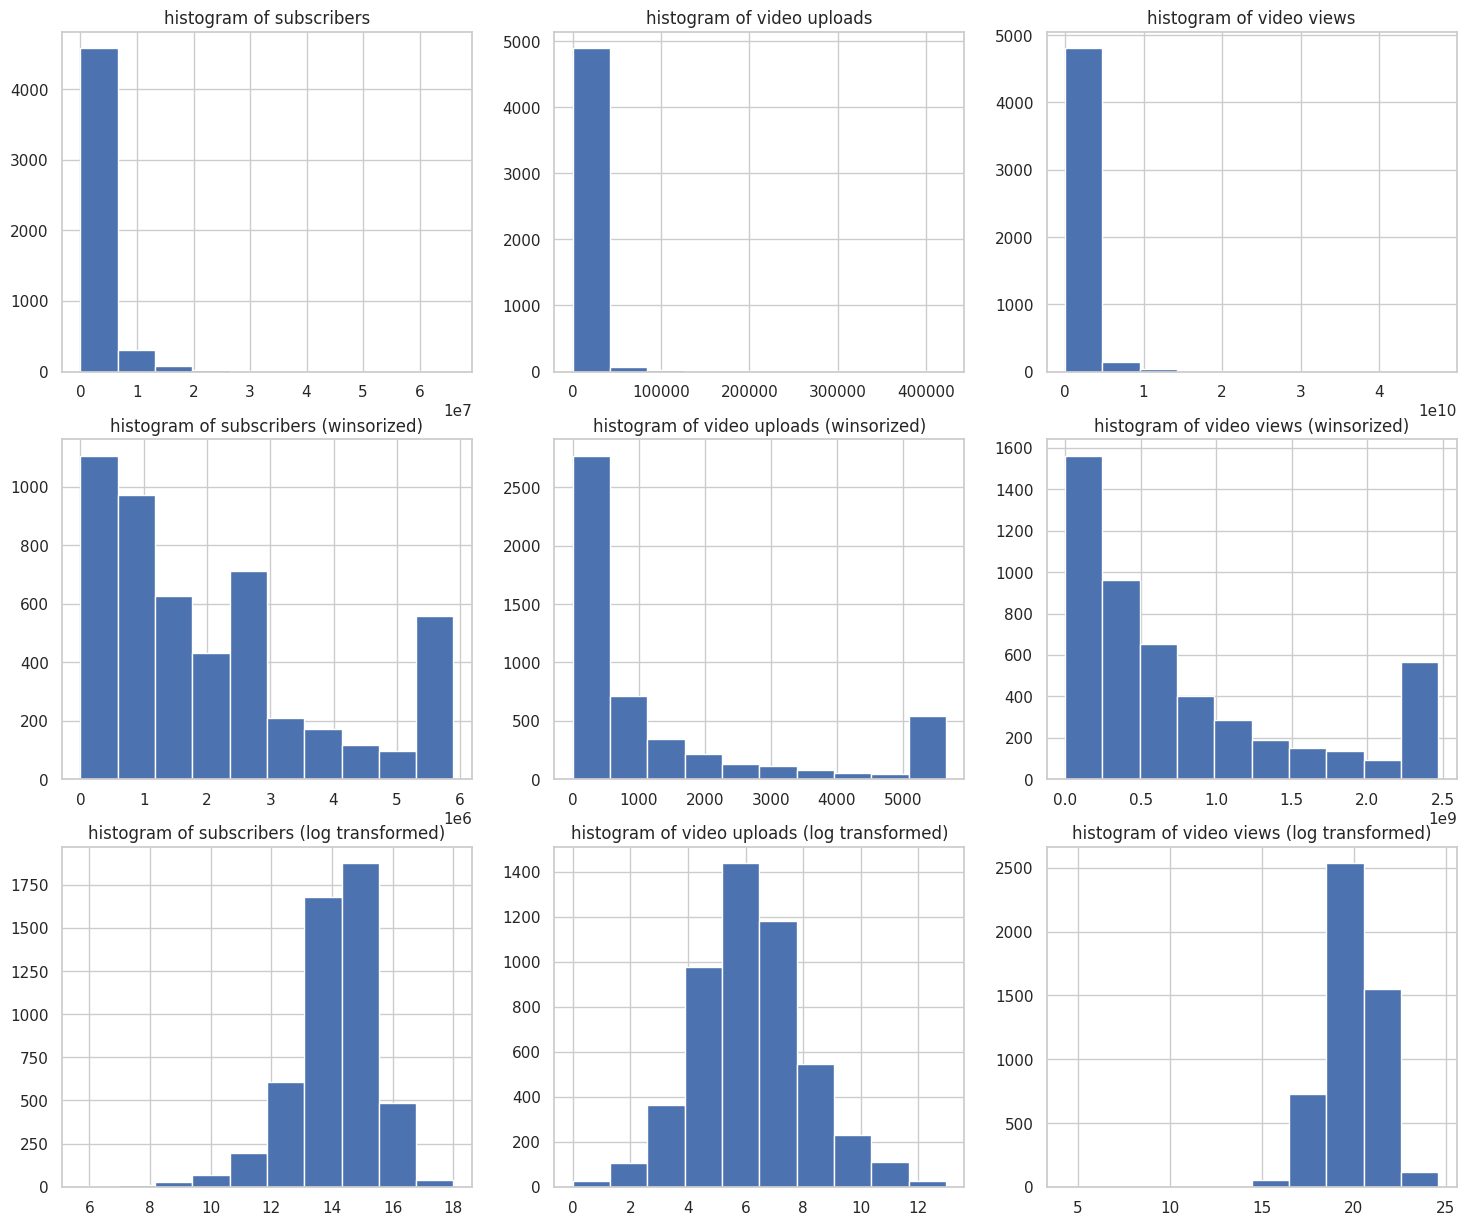

In [3]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(youtube_df["Subscribers"])
plt.title("histogram of subscribers")

plt.subplot(3, 3, 2)
plt.hist(youtube_df["Video Uploads"])
plt.title("histogram of video uploads")

plt.subplot(3, 3, 3)
plt.hist(youtube_df["Video views"])
plt.title("histogram of video views")

# Histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(youtube_df["winsorized_subscribers"])
plt.title("histogram of subscribers (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(youtube_df["winsorized_uploads"])
plt.title("histogram of video uploads (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(youtube_df["winsorized_views"])
plt.title("histogram of video views (winsorized)")

# Histograms of the log-transformed data
plt.subplot(3, 3, 7)
plt.hist(np.log(youtube_df["Subscribers"]))
plt.title("histogram of subscribers (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(youtube_df["Video Uploads"]))
plt.title("histogram of video uploads (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(youtube_df["Video views"]))
plt.title("histogram of video views (log transformed)")


plt.show()

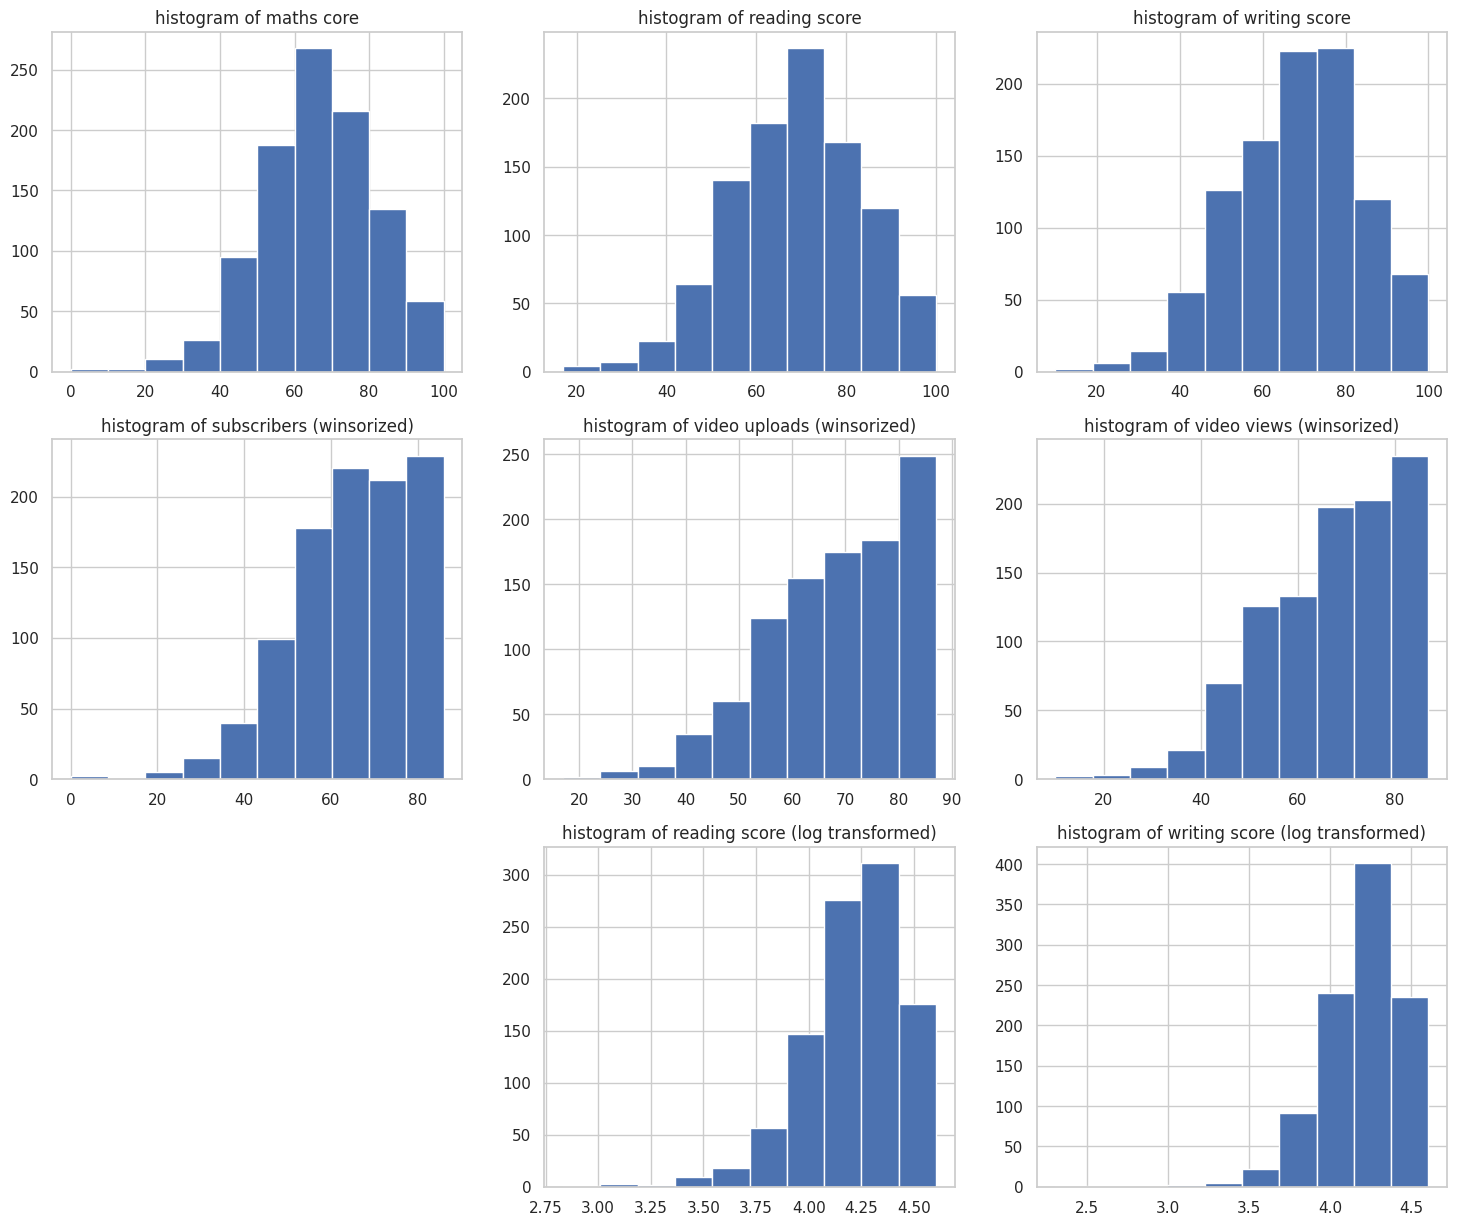

In [36]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(studentsperformance_df["math score"])
plt.title("histogram of maths core")

plt.subplot(3, 3, 2)
plt.hist(studentsperformance_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(3, 3, 3)
plt.hist(studentsperformance_df["writing score"])
plt.title("histogram of writing score")

# Histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(studentsperformance_df["winsorized_math_score"])
plt.title("histogram of subscribers (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(studentsperformance_df["winsorized_reading_score"])
plt.title("histogram of video uploads (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(studentsperformance_df["winsorized_writing_score"])
plt.title("histogram of video views (winsorized)")

# Histograms of the log-transformed data
#plt.subplot(3, 3, 7)
#plt.hist(np.log(studentsperformance_df["math score"]))
#plt.title("histogram of math score (log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(studentsperformance_df["reading score"]))
plt.title("histogram of reading score (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(studentsperformance_df["writing score"]))
plt.title("histogram of writing score (log transformed)")

plt.show()

The histogram of math, reading and writing scores are not normally distributed

In [37]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(np.log(studentsperformance_df["math score"]))
norm_stats = normaltest(np.log(studentsperformance_df["math score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(studentsperformance_df["reading score"]))
norm_stats = normaltest(np.log(studentsperformance_df["reading score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(studentsperformance_df["writing score"]))
norm_stats = normaltest(np.log(studentsperformance_df["writing score"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is nan and p value is nan
Normality test statistics is nan and p value is nan
Jarque-Bera test statistics is 495.1273179446675 and p value is 3.0511881465966878e-108
Normality test statistics is 209.7715093472919 and p value is 2.8099300901335873e-46
Jarque-Bera test statistics is 1410.9370069257493 and p value is 4.1583571744900775e-307
Normality test statistics is 318.9692123027676 and p value is 5.454005856377552e-70


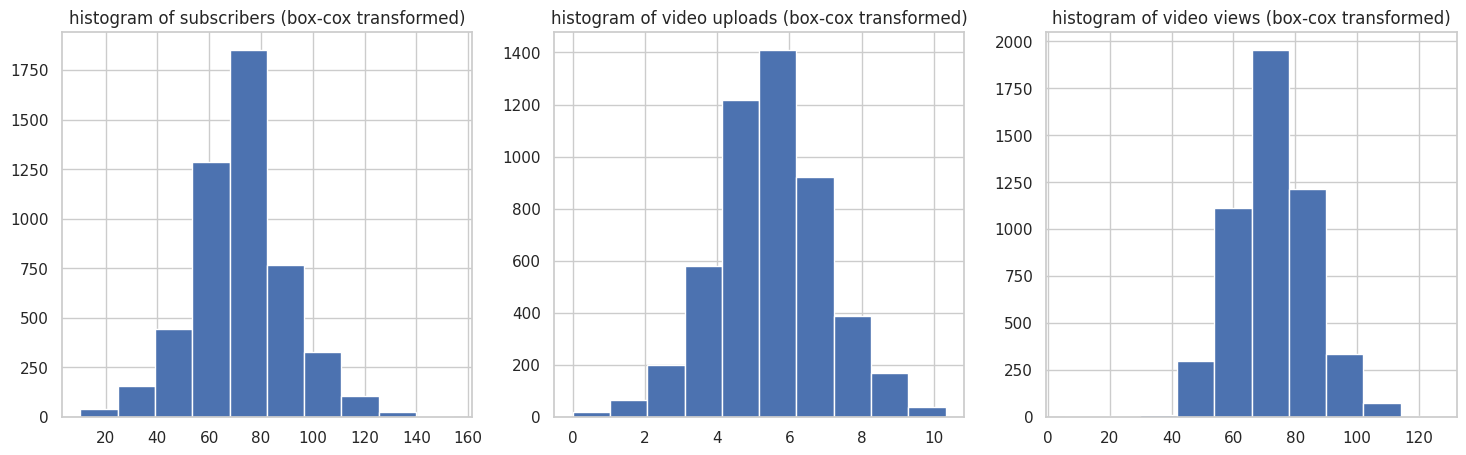

In [5]:
from scipy.stats import boxcox

# Save the transformed array, then the lambda as variable name and _ respectively
video_uploads_boxcox,_ = boxcox(youtube_df["Video Uploads"])
subscribers_boxcox,_ = boxcox(youtube_df["Subscribers"])
video_views_boxcox,_ = boxcox(youtube_df["Video views"])

plt.figure(figsize=(18,5))

# Histograms of the Box-Cox-transformed data
plt.subplot(1, 3, 1)
plt.hist(subscribers_boxcox)
plt.title("histogram of subscribers (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(video_uploads_boxcox)
plt.title("histogram of video uploads (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(video_views_boxcox)
plt.title("histogram of video views (box-cox transformed)")

plt.show()

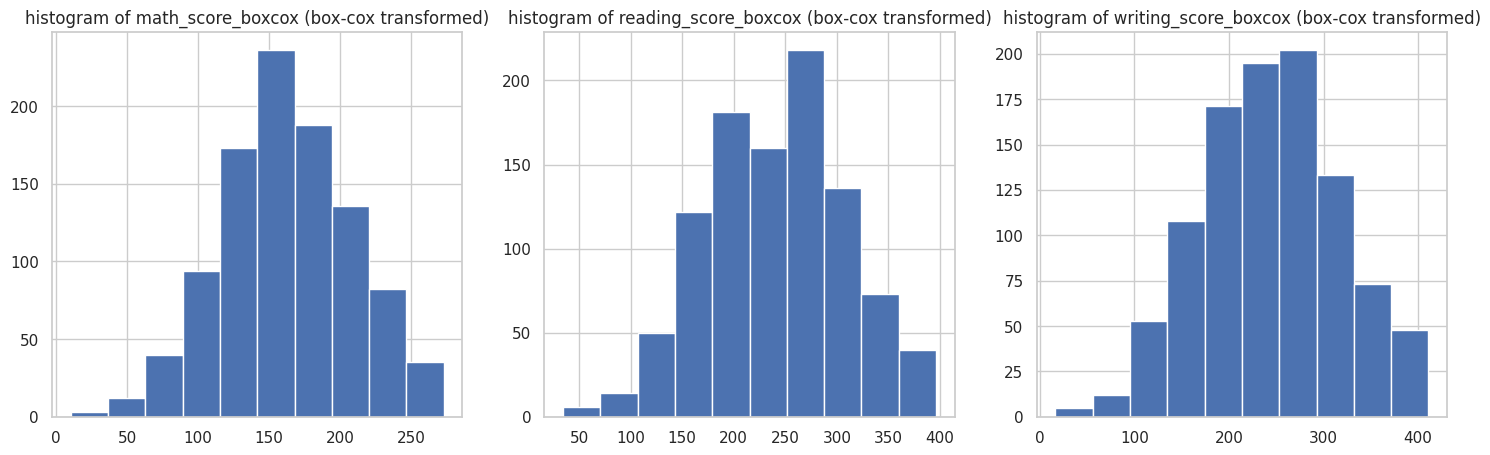

In [38]:
from scipy.stats import boxcox

# Save the transformed array, then the lambda as variable name and _ respectively
math_score_boxcox,_ = boxcox(studentsperformance_df[studentsperformance_df["math score"] > 0]["math score"])
reading_score_boxcox,_ = boxcox(studentsperformance_df["reading score"])
writing_score_boxcox,_ = boxcox(studentsperformance_df["writing score"])

plt.figure(figsize=(18,5))

# Histograms of the Box-Cox-transformed data

plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of math_score_boxcox (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading_score_boxcox (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing_score_boxcox (box-cox transformed)")

plt.show()

After box cox, the distribution looks normal for reading, math and writing scores

In [6]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(subscribers_boxcox)
norm_stats = normaltest(subscribers_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(video_uploads_boxcox)
norm_stats = normaltest(video_uploads_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(video_views_boxcox)
norm_stats = normaltest(video_views_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 112.35225936971695 and p value is 4.008822831501084e-25
Normality test statistics is 64.41977780861806 and p value is 1.0266513584521004e-14
Jarque-Bera test statistics is 32.00437101780299 and p value is 1.1228949665676423e-07
Normality test statistics is 23.235963339562396 and p value is 9.0027392143869e-06
Jarque-Bera test statistics is 93.4064116324942 and p value is 5.212612327994373e-21
Normality test statistics is 55.77146378439329 and p value is 7.751406546166845e-13


In [42]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(studentsperformance_df["math score"])
norm_stats = normaltest(studentsperformance_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(studentsperformance_df["reading score"])
norm_stats = normaltest(studentsperformance_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(studentsperformance_df["writing score"])
norm_stats = normaltest(studentsperformance_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712718 and p value is 0.00035050753868178273
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987937 and p value is 0.00337402026722133
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.985094482572304 and p value is 0.0009187033894586772
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [43]:
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836206 and p value is 0.4231412920959954
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559649 and p value is 0.12746808151540903
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042767 and p value is 0.09317842784043168
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


In [44]:
avg_score = (studentsperformance_df["math score"] +
              studentsperformance_df["reading score"] + studentsperformance_df["writing score"])/3


Taking average from the three scores [math, reading and writing] and applying normal test on it

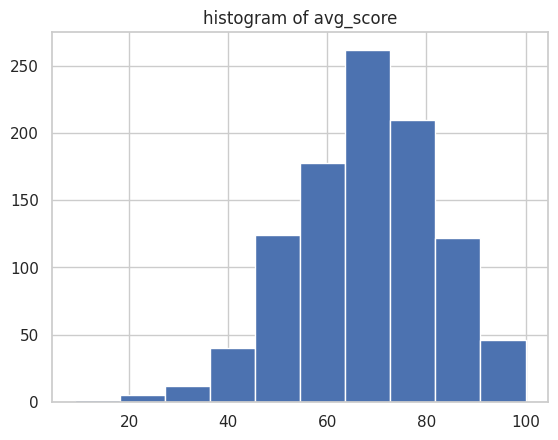

Jarque-Bera test statistics is 15.453387913085388 and p value is 0.00044089934264402483
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [45]:
plt.hist(avg_score)
plt.title("histogram of avg_score")
plt.show()

jb_stats = jarque_bera(avg_score)
norm_stats = normaltest(avg_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

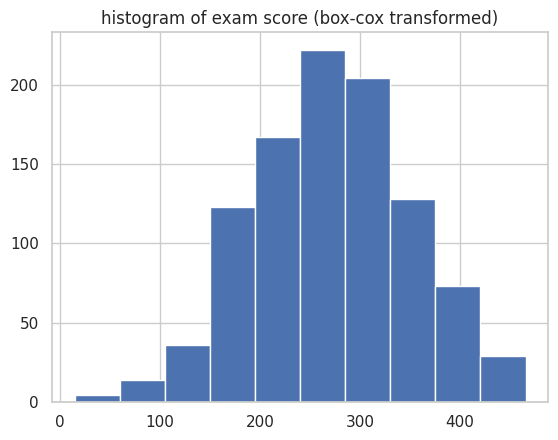

Jarque-Bera test statistics is 2.4353989331279235 and p value is 0.29591013563984125
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [46]:
avg_score_boxcox,_ = boxcox(avg_score)

plt.hist(avg_score_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(avg_score_boxcox)
norm_stats = normaltest(avg_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

after box cox to new avg score, the distributiob appears normal

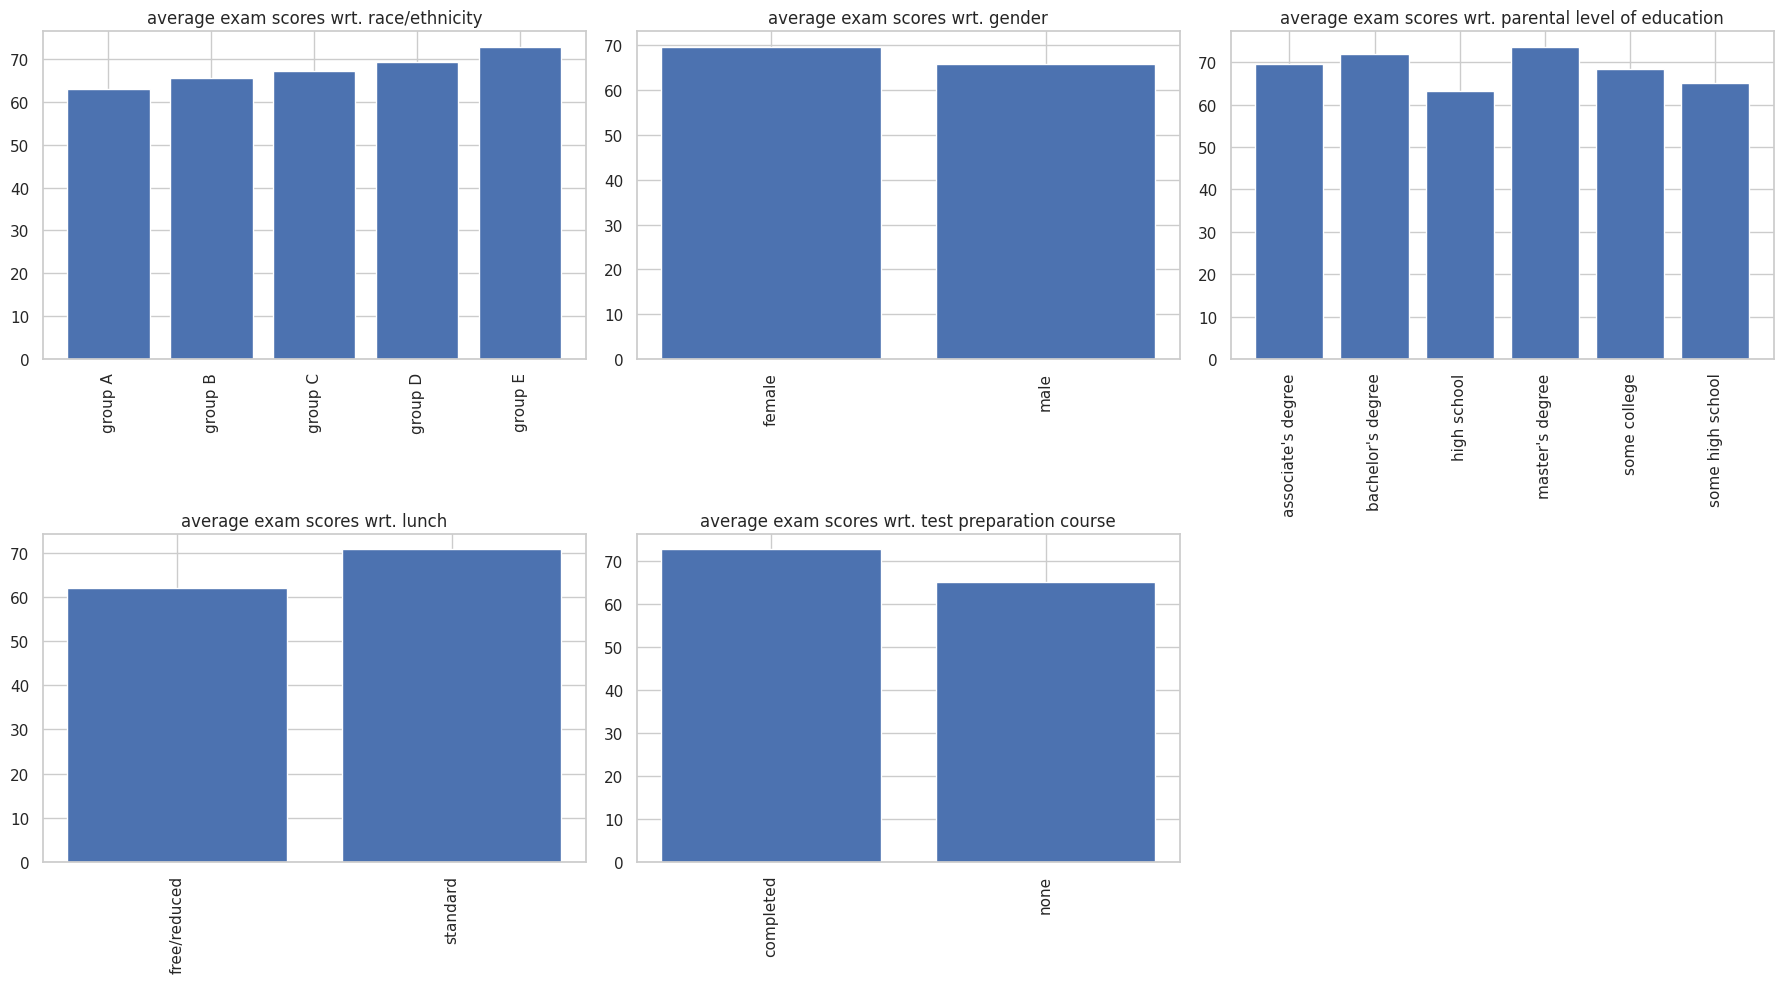

In [47]:
studentsperformance_df["avg_score"] = avg_score

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(studentsperformance_df.groupby("race/ethnicity")
        ["avg_score"].mean().index, studentsperformance_df.groupby("race/ethnicity")["avg_score"].mean())

plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(studentsperformance_df.groupby("gender")
        ["avg_score"].mean().index, studentsperformance_df.groupby("gender")["avg_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(studentsperformance_df.groupby("parental level of education")
        ["avg_score"].mean().index, studentsperformance_df.groupby("parental level of education")["avg_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(studentsperformance_df.groupby("lunch")
        ["avg_score"].mean().index, studentsperformance_df.groupby("lunch")["avg_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(studentsperformance_df.groupby("test preparation course")
        ["avg_score"].mean().index, studentsperformance_df.groupby("test preparation course")["avg_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

Average exam scores by race//ethinicity is increasing in group E and lesser in group A

Average exam scores is higher in females than in males

Average exam score is higher for master degree parental education

Average exam scores is less for free/reduced lunch than standard lunch

Average exam scores is higher when test preparation course is completed


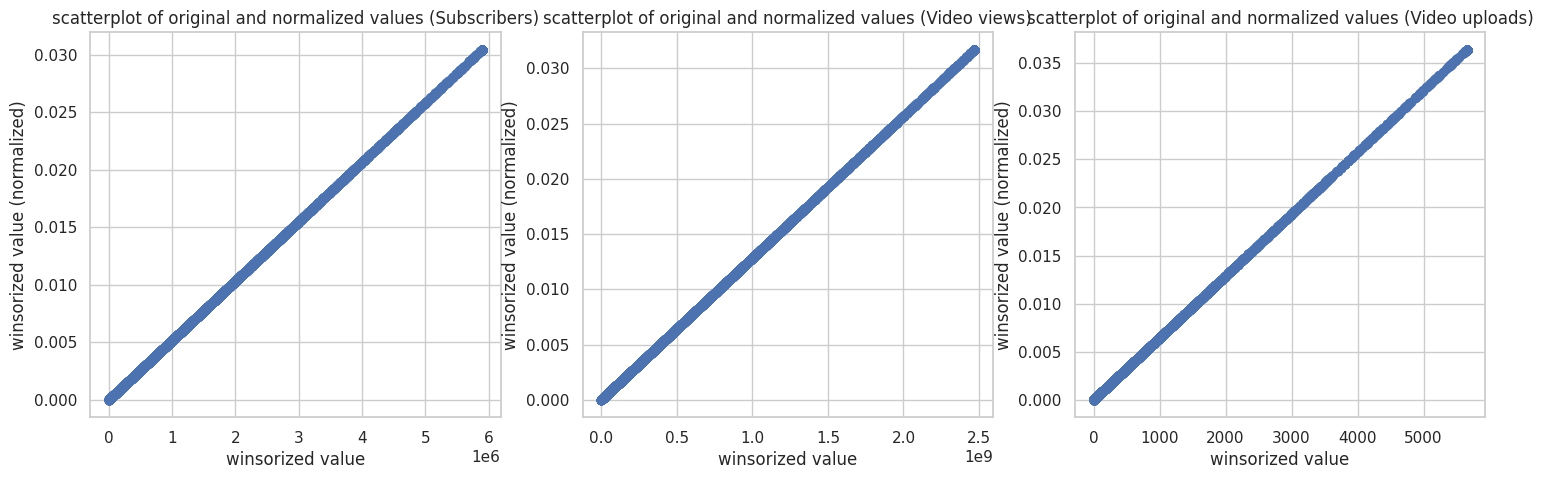

In [7]:
from sklearn.preprocessing import normalize

# Normalize the winsorized variables
youtube_df["norm_winsorized_subscribers"] = normalize(np.array(youtube_df["winsorized_subscribers"]).reshape(1,-1)).reshape(-1,1)
youtube_df["norm_winsorized_views"] = normalize(np.array(youtube_df["winsorized_views"]).reshape(1,-1)).reshape(-1,1)
youtube_df["norm_winsorized_uploads"] = normalize(np.array(youtube_df["winsorized_uploads"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_subscribers"], youtube_df["norm_winsorized_subscribers"])
plt.title("scatterplot of original and normalized values (Subscribers)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(1,3,2)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_views"], youtube_df["norm_winsorized_views"])
plt.title("scatterplot of original and normalized values (Video views)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.subplot(1,3,3)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_uploads"], youtube_df["norm_winsorized_uploads"])
plt.title("scatterplot of original and normalized values (Video uploads)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (normalized)")

plt.show()

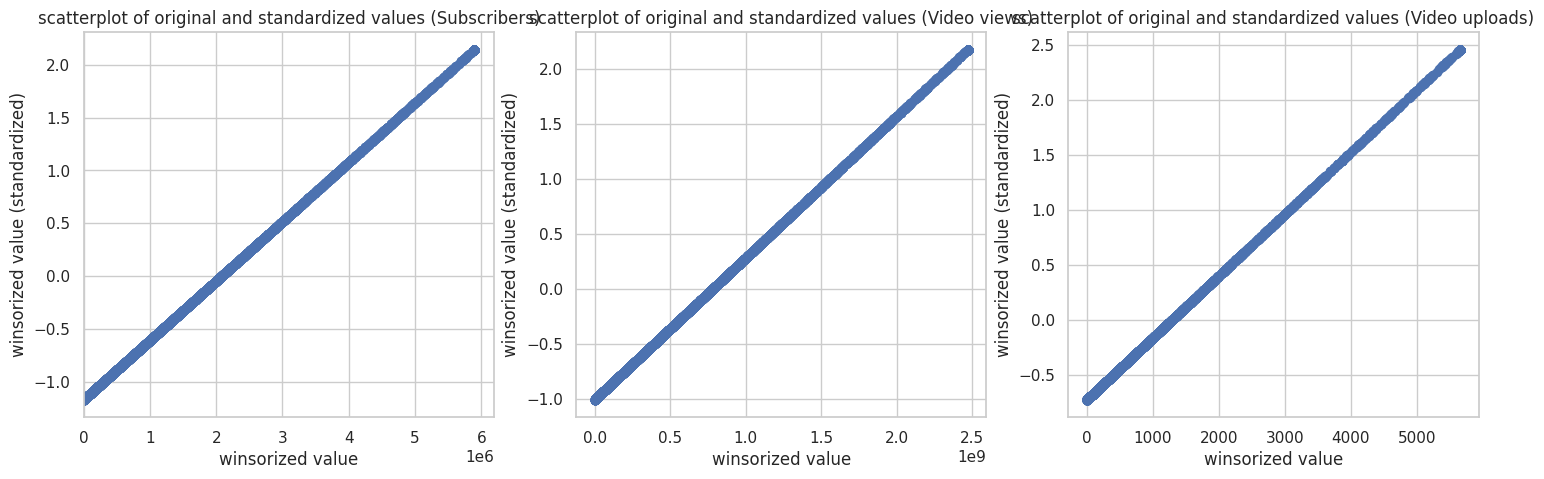

In [8]:
from sklearn.preprocessing import scale

youtube_df["scaled_winsorized_subscribers"] = scale(youtube_df["winsorized_subscribers"])
youtube_df["scaled_winsorized_views"] = scale(youtube_df["winsorized_views"])
youtube_df["scaled_winsorized_uploads"] = scale(youtube_df["winsorized_uploads"])

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_subscribers"], youtube_df["scaled_winsorized_subscribers"])
plt.title("scatterplot of original and standardized values (Subscribers)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")
plt.xlim(0.00000001)

plt.subplot(1,3,2)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_views"], youtube_df["scaled_winsorized_views"])
plt.title("scatterplot of original and standardized values (Video views)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.subplot(1,3,3)
# Draw the scatter plot using seaborn
plt.scatter(youtube_df["winsorized_uploads"], youtube_df["scaled_winsorized_uploads"])
plt.title("scatterplot of original and standardized values (Video uploads)")
plt.xlabel("winsorized value")
plt.ylabel("winsorized value (standardized)")

plt.show()

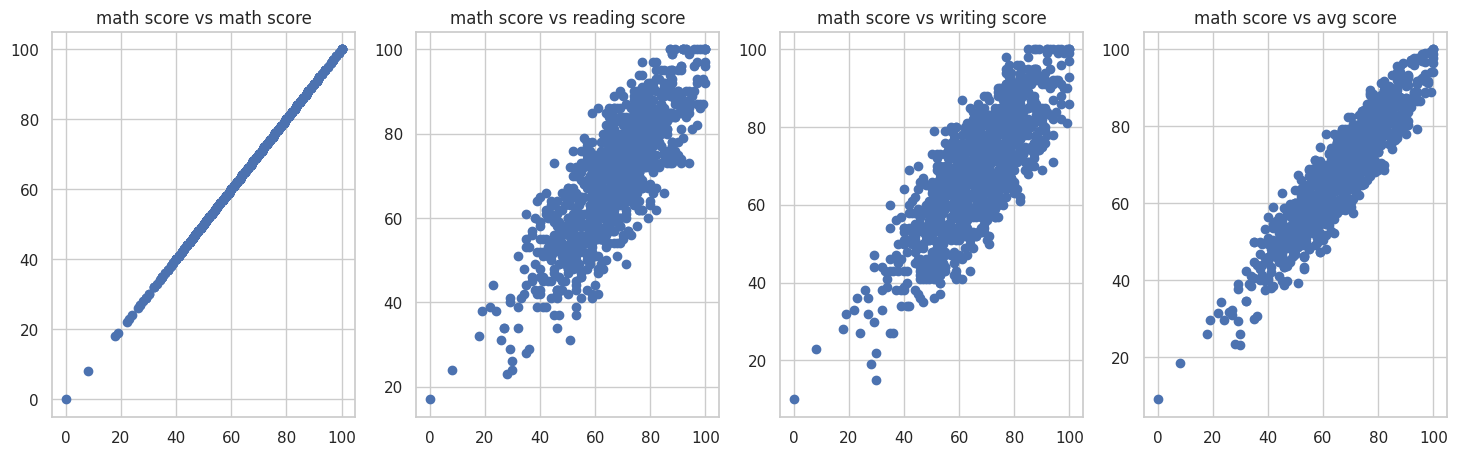

In [49]:

plt.figure(figsize=(18,5))

plt.subplot(1,4,1)
plt.scatter(studentsperformance_df["math score"], studentsperformance_df["math score"])
plt.title("math score vs math score")

plt.subplot(1,4,2)
plt.scatter(studentsperformance_df["math score"], studentsperformance_df["reading score"])
plt.title("math score vs reading score")

plt.subplot(1,4,3)
plt.scatter(studentsperformance_df["math score"], studentsperformance_df["writing score"])
plt.title("math score vs writing score")

plt.subplot(1,4,4)
plt.scatter(studentsperformance_df["math score"], studentsperformance_df["avg_score"])
plt.title("math score vs avg score")

plt.show()

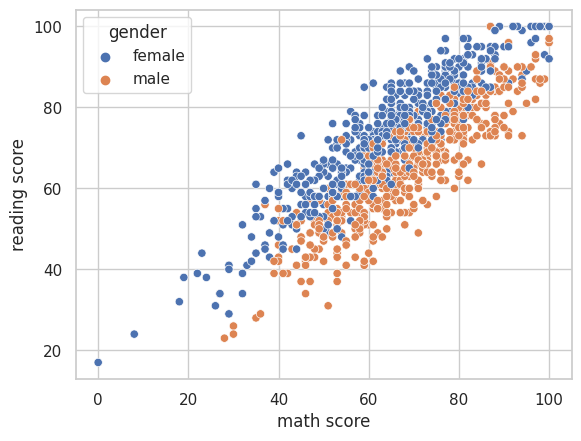

In [51]:
sns.scatterplot(x="math score", y="reading score", hue="gender", data=studentsperformance_df);

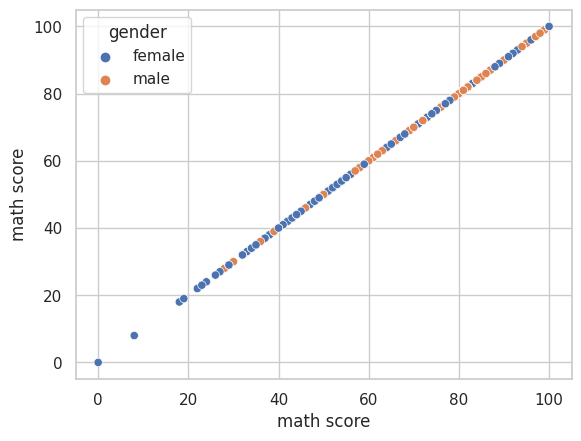

In [52]:
sns.scatterplot(x="math score", y="math score", hue="gender", data=studentsperformance_df);

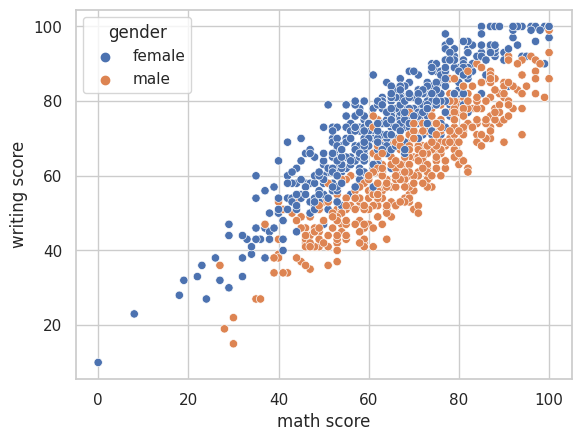

In [53]:
sns.scatterplot(x="math score", y="writing score", hue="gender", data=studentsperformance_df);

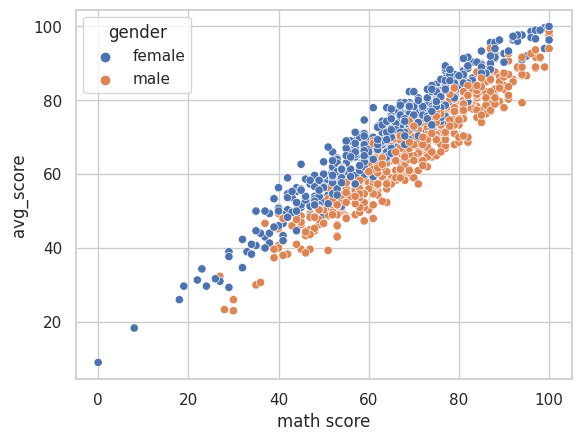

In [54]:
sns.scatterplot(x="math score", y="avg_score", hue="gender", data=studentsperformance_df);